Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [17]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from glob import glob

In [1]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [73]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
path_to_train_dir = "/content/gdrive/MyDrive/Upgrad/Melonoma/Train/"
path_to_test_dir = "/content/gdrive/MyDrive/Upgrad/Melonoma/Test/"
data_dir_train = pathlib.Path(path_to_train_dir)
#data_dir_test = pathlib.Path(path_to_test_dir)

In [4]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
#image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
#print(image_count_test)

2239


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [5]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [6]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset

def createTrainDataset():
  train_ds = tf.keras.preprocessing.image_dataset_from_directory(
      data_dir_train, batch_size = batch_size, image_size=(img_height, img_width),
      shuffle=True, seed=123, validation_split=0.2, subset="training"
  )

  return train_ds

In [7]:
train_ds = createTrainDataset()

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [8]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
def createValidationDataset():
  val_ds = tf.keras.preprocessing.image_dataset_from_directory(
      data_dir_train, batch_size = batch_size, image_size=(img_height, img_width),
      shuffle=True, seed=123, validation_split=0.2, subset="validation"
  )

  return val_ds

In [9]:
val_ds = createValidationDataset()

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [10]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Visualize one instance of all the nine classes present in the dataset

In [38]:
import random

def randomlyPlotOneImageFromDifferentClasses():
  plt.figure(figsize = (10,10))
  for i in range(len(class_names)):
    ax = plt.subplot(3, 3, i+1)
    classname = class_names[i]
    imagelist = list(data_dir_train.glob( classname + '/*.jpg'))  
    imageindex = random.randint(0, len(imagelist) - 1)
    imagepath = imagelist[imageindex]
    plt.imshow(img.imread(imagepath))
    plt.title(classname)
    plt.axis('off')


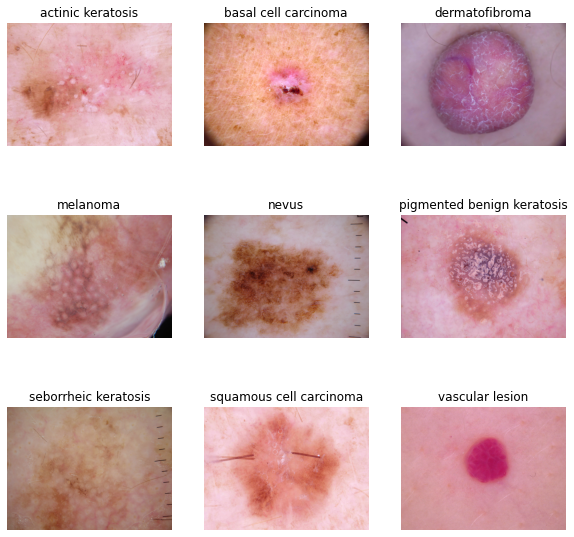

In [39]:
randomlyPlotOneImageFromDifferentClasses()

In [40]:
for images, labels in train_ds.take(1):
  print(labels)

tf.Tensor([4 8 8 3 3 4 7 5 3 4 4 5 1 6 0 5 4 3 1 1 4 2 3 3 2 4 4 6 4 0 0 3], shape=(32,), dtype=int32)


The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [41]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create and compile the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

#### Choose an appropirate optimiser and loss function for model training 

In [42]:
### Your code goes here
def createCnnModel():
  model = Sequential([
                      layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
                      layers.Conv2D(16,3, padding="same", activation="relu"),
                      layers.MaxPool2D(),
                      layers.Conv2D(32,3, padding="same", activation="relu"),
                      layers.MaxPool2D(),
                      layers.Conv2D(64,3, padding="same", activation="relu"),
                      layers.MaxPool2D(),
                      layers.Flatten(),
                      layers.Dense(128,activation="relu"),
                      layers.Dense(9, activation="softmax")
  ])

 
  return model;



In [43]:
model = createCnnModel()

### Compile the model

#### Choose an appropirate optimiser and loss function for model training 

In [44]:
def compileModel(model):
  model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [45]:
compileModel(model)

In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

### Train the model

In [47]:
def trainModel(model, epochs):
  history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
  )

  return history

In [49]:
history = trainModel(model, 20)

Epoch 1/20
56/56 [==============================] - 3s 48ms/step - loss: 1.6755 - accuracy: 0.3968 - val_loss: 1.5046 - val_accuracy: 0.4765
Epoch 2/20
56/56 [==============================] - 3s 46ms/step - loss: 1.4662 - accuracy: 0.5028 - val_loss: 1.4313 - val_accuracy: 0.5123
Epoch 3/20
56/56 [==============================] - 3s 47ms/step - loss: 1.3613 - accuracy: 0.5335 - val_loss: 1.3478 - val_accuracy: 0.5302
Epoch 4/20
56/56 [==============================] - 3s 45ms/step - loss: 1.2613 - accuracy: 0.5636 - val_loss: 1.3765 - val_accuracy: 0.5481
Epoch 5/20
56/56 [==============================] - 3s 45ms/step - loss: 1.1420 - accuracy: 0.6021 - val_loss: 1.3637 - val_accuracy: 0.5459
Epoch 6/20
56/56 [==============================] - 3s 45ms/step - loss: 1.0710 - accuracy: 0.6228 - val_loss: 1.4091 - val_accuracy: 0.5369
Epoch 7/20
56/56 [==============================] - 3s 45ms/step - loss: 1.0101 - accuracy: 0.6217 - val_loss: 1.5000 - val_accuracy: 0.4899
Epoch 8/20
56

### Visualizing training results

In [56]:
def plotAccuracyAndLoss(history, epochs):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs_range = range(epochs)

  plt.figure(figsize=(8, 8))
  plt.subplot(1, 2, 1)
  plt.plot(epochs_range, acc, label='Training Accuracy')
  plt.plot(epochs_range, val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.title('Training and Validation Accuracy')

  plt.subplot(1, 2, 2)
  plt.plot(epochs_range, loss, label='Training Loss')
  plt.plot(epochs_range, val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Training and Validation Loss')
  plt.show()


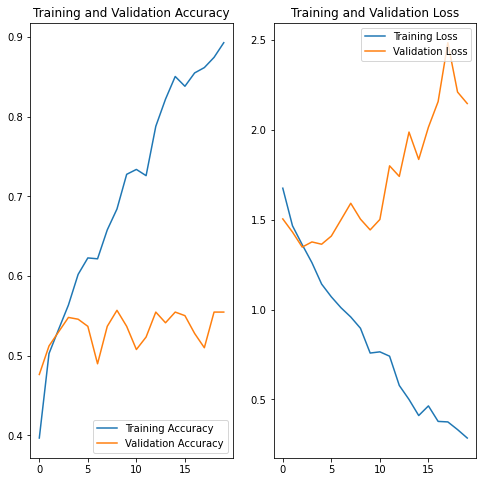

In [51]:
plotAccuracyAndLoss(history, 20)

#### Write your findings after the model fit, see if there is an evidence 
* As evident from graph above till 4th epoch, trainig and validation accuracy stays same (around 50%). But after that, we see validation accuracy remains same, but training accuracy goes up to 90%. Which is a clear indication of overfitting. Same analogy applies to Train/Validation loss as well

### Fix overfitting with augmentation technique

#### **Output random augmented images from each class**

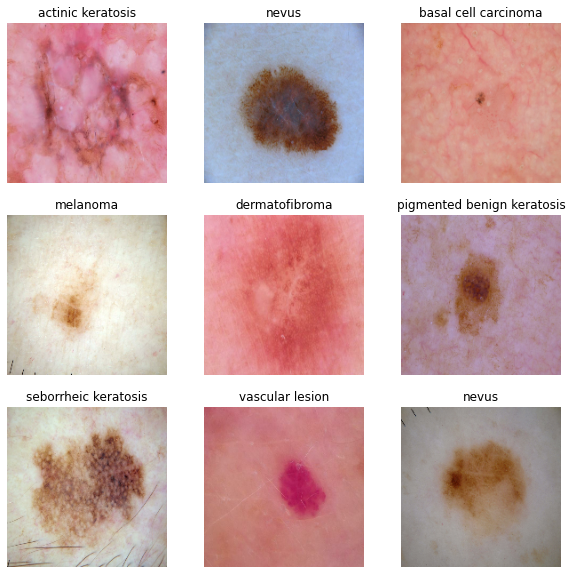

In [99]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
    ]
)

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(data_augmentation(images)[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

#### **Create the Model**

In [52]:
# After analysing the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here
def createCnnModelWithAugmentation():
  model = Sequential([
                      layers.RandomFlip("horizontal"),
                      layers.RandomRotation(0.1),
                      layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
                      layers.Conv2D(16,3, padding="same", activation="relu"),
                      layers.MaxPool2D(),
                      layers.Conv2D(32,3, padding="same", activation="relu"),
                      layers.MaxPool2D(),
                      layers.Conv2D(64,3, padding="same", activation="relu"),
                      layers.MaxPool2D(),
                      layers.Flatten(),
                      layers.Dense(128,activation="relu"),
                      layers.Dense(9, activation="softmax")
  ])
  
  return model

In [53]:
model = createCnnModelWithAugmentation();

#### **Compile the Model**

In [54]:
# Compile the model
compileModel(model)

#### **Train the model**

In [55]:
# Train the model
history = trainModel(model, 20)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


56/56 [==============================] - 5s 55ms/step - loss: 2.0535 - accuracy: 0.2550 - val_loss: 1.8460 - val_accuracy: 0.3445
Epoch 2/20
56/56 [==============================] - 3s 50ms/step - loss: 1.6866 - accuracy: 0.4107 - val_loss: 1.6181 - val_accuracy: 0.4206
Epoch 3/20
56/56 [==============================] - 3s 50ms/step - loss: 1.5678 - accuracy: 0.4420 - val_loss: 1.5040 - val_accuracy: 0.4430
Epoch 4/20
56/56 [==============================] - 3s 50ms/step - loss: 1.5029 - accuracy: 0.4805 - val_loss: 1.4048 - val_accuracy: 0.5168
Epoch 5/20
56/56 [==============================] - 3s 49ms/step - loss: 1.3619 - accuracy: 0.5229 - val_loss: 1.3993 - val_accuracy: 0.5257
Epoch 6/20
56/56 [==============================] - 3s 49ms/step - loss: 1.3031 - accuracy: 0.5474 - val_loss: 1.3505 - val_accuracy: 0.5257
Epoch 7/20
56/56 [==============================] - 3s 50ms/step - loss: 1.3032 - accuracy: 0.5374 - val_loss: 1.3616 - val_accuracy: 0.5235
Epoch 8/20
56/56 [======

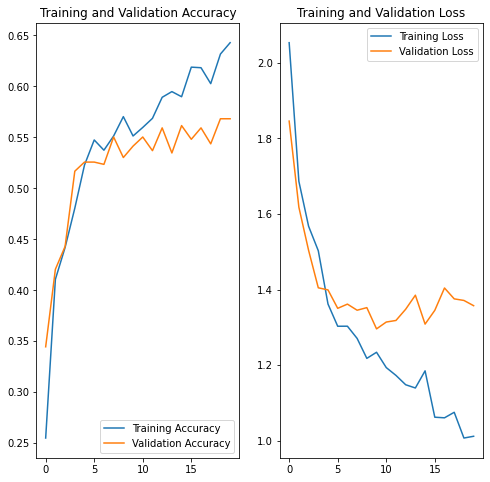

In [57]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
plotAccuracyAndLoss(history, 20)

#### Finds from augmentation technique
* As evident from the graph above validation accuracy is very similar to training accuracy, which indicates that we solved the problem of overfitting to an extent. There is still some evidence of overfitting, but its significantly less compared to previous model. However the validation accuracy is still pretty low at 56%

### Add dropout to see if we can minimize overfitting more and improve performance of out model



### Create the model

In [58]:
## You can use Dropout layer if there is an evidence of overfitting in your findings
def createCnnModelWithAugmentationAndDropout():
  model = Sequential([
                      layers.RandomFlip("horizontal"),
                      layers.RandomRotation(0.1),
                      layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
                      layers.Conv2D(16,3, padding="same", activation="relu"),
                      layers.MaxPool2D(),
                      layers.Conv2D(32,3, padding="same", activation="relu"),
                      layers.MaxPool2D(),
                      layers.Conv2D(64,3, padding="same", activation="relu"),
                      layers.MaxPool2D(),
                      layers.Dropout(0.25),
                      layers.Flatten(),                      
                      layers.Dense(128,activation="relu"),
                      layers.Dropout(0.5),
                      layers.Dense(9, activation="softmax")
  ])  
  return model;


In [59]:
model = createCnnModelWithAugmentationAndDropout()

### Compiling the model

In [60]:
compileModel(model)

### Training the model

In [61]:
## Your code goes here, note: train your model for 20 epochs
history = trainModel(model, 20)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


56/56 [==============================] - 4s 55ms/step - loss: 2.2288 - accuracy: 0.1808 - val_loss: 2.0235 - val_accuracy: 0.1924
Epoch 2/20
56/56 [==============================] - 3s 50ms/step - loss: 1.9693 - accuracy: 0.2651 - val_loss: 1.7839 - val_accuracy: 0.3937
Epoch 3/20
56/56 [==============================] - 3s 50ms/step - loss: 1.9183 - accuracy: 0.3030 - val_loss: 1.7457 - val_accuracy: 0.3982
Epoch 4/20
56/56 [==============================] - 3s 50ms/step - loss: 1.7902 - accuracy: 0.3460 - val_loss: 1.7521 - val_accuracy: 0.3490
Epoch 5/20
56/56 [==============================] - 3s 51ms/step - loss: 1.6952 - accuracy: 0.3884 - val_loss: 1.6609 - val_accuracy: 0.4318
Epoch 6/20
56/56 [==============================] - 3s 50ms/step - loss: 1.7953 - accuracy: 0.3404 - val_loss: 1.5859 - val_accuracy: 0.4564
Epoch 7/20
56/56 [==============================] - 3s 50ms/step - loss: 1.6117 - accuracy: 0.4275 - val_loss: 1.4808 - val_accuracy: 0.4922
Epoch 8/20
56/56 [======

### Visualizing the results

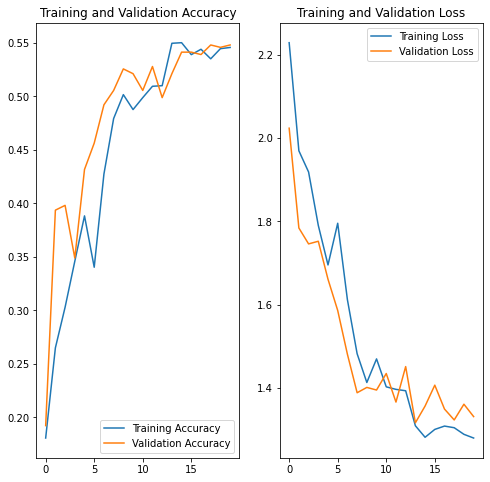

In [62]:
plotAccuracyAndLoss(history, 20)

#### Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?
* The training and validation accuracy are following each other pretty closely. And we have almost eliminated the problem of overfitting. This is an improvement over previous model. Model accuracy is still capped at 55% though

#### **Find the distribution of classes in the training dataset.**
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

<BarContainer object of 9 artists>

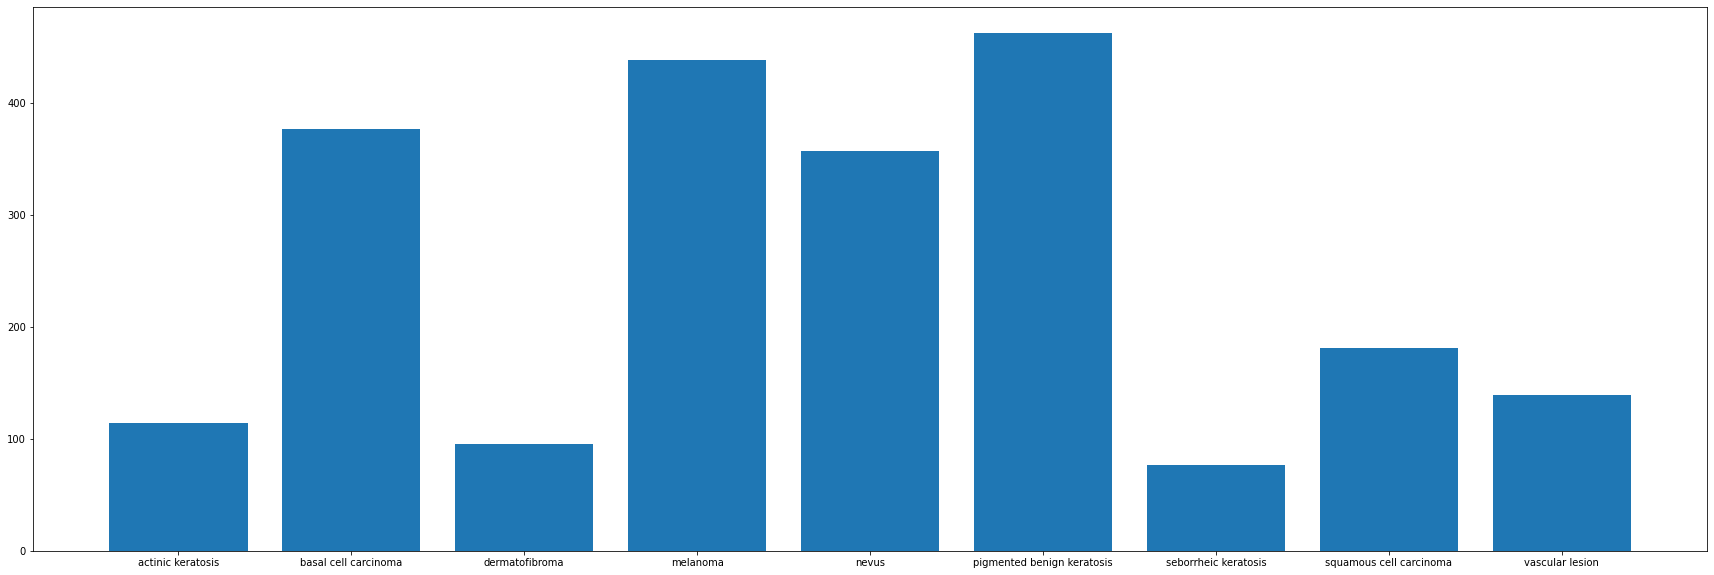

In [69]:
## Your code goes here.
imagecounts = []
for classname in class_names:
    totalimages = len(list(data_dir_train.glob(classname +'/*.jpg')))
    imagecounts.append(totalimages)
plt.figure(figsize=(30,10))
plt.bar(class_names,imagecounts)

#### **Write your findings here:** 
#### - Which class has the least number of samples?
* seborrheic keratosis

#### - Which classes dominate the data in terms proportionate number of samples?
* pigmented benign keratosis


### **Rectify the class imbalance**
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [70]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [74]:
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_train_dir + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/Upgrad/Melonoma/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FA84F2E0410>: 100%|██████████| 500/500 [00:20<00:00, 24.07 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/Upgrad/Melonoma/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FA84F20B110>: 100%|██████████| 500/500 [00:21<00:00, 23.65 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/Upgrad/Melonoma/Train/dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FA84F2E0E10>: 100%|██████████| 500/500 [00:22<00:00, 22.43 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/Upgrad/Melonoma/Train/melanoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=3072x2304 at 0x7FA854310890>: 100%|██████████| 500/500 [01:44<00:00,  4.78 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/Upgrad/Melonoma/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FA854471210>: 100%|██████████| 500/500 [01:42<00:00,  4.89 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/Upgrad/Melonoma/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FA84F54FA90>: 100%|██████████| 500/500 [00:21<00:00, 23.41 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/Upgrad/Melonoma/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FA84F26A190>: 100%|██████████| 500/500 [00:48<00:00, 10.35 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/Upgrad/Melonoma/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FA852225FD0>: 100%|██████████| 500/500 [00:21<00:00, 23.59 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/Upgrad/Melonoma/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FA84F26A350>: 100%|██████████| 500/500 [00:21<00:00, 22.78 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [75]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [76]:
from glob import glob

In [77]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list[0:10]

['/content/gdrive/MyDrive/Upgrad/Melonoma/Train/vascular lesion/output/vascular lesion_original_ISIC_0028163.jpg_9e2b533d-2929-41e5-ba37-23a6cfb51db0.jpg',
 '/content/gdrive/MyDrive/Upgrad/Melonoma/Train/vascular lesion/output/vascular lesion_original_ISIC_0032076.jpg_67a06a0e-93a5-476d-8d37-f0305a08019e.jpg',
 '/content/gdrive/MyDrive/Upgrad/Melonoma/Train/vascular lesion/output/vascular lesion_original_ISIC_0026713.jpg_5ef1796d-37f6-4a86-86e6-b57ab91df587.jpg',
 '/content/gdrive/MyDrive/Upgrad/Melonoma/Train/vascular lesion/output/vascular lesion_original_ISIC_0033762.jpg_43f334c5-79e2-4883-bcca-17057b676186.jpg',
 '/content/gdrive/MyDrive/Upgrad/Melonoma/Train/vascular lesion/output/vascular lesion_original_ISIC_0027256.jpg_49dfd598-36bd-48ec-bd2b-833387b4326c.jpg',
 '/content/gdrive/MyDrive/Upgrad/Melonoma/Train/vascular lesion/output/vascular lesion_original_ISIC_0026092.jpg_8a5de44c-82ab-4eb6-becc-9c38da228851.jpg',
 '/content/gdrive/MyDrive/Upgrad/Melonoma/Train/vascular lesion/

In [78]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new[0:10]

['vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion']

In [79]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [80]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
#new_df = original_df.append(df2)
df2.head(10)

,Path,Label
0,/content/gdrive/MyDrive/Upgrad/Melonoma/Train/...,vascular lesion
1,/content/gdrive/MyDrive/Upgrad/Melonoma/Train/...,vascular lesion
2,/content/gdrive/MyDrive/Upgrad/Melonoma/Train/...,vascular lesion
3,/content/gdrive/MyDrive/Upgrad/Melonoma/Train/...,vascular lesion
4,/content/gdrive/MyDrive/Upgrad/Melonoma/Train/...,vascular lesion
5,/content/gdrive/MyDrive/Upgrad/Melonoma/Train/...,vascular lesion
6,/content/gdrive/MyDrive/Upgrad/Melonoma/Train/...,vascular lesion
7,/content/gdrive/MyDrive/Upgrad/Melonoma/Train/...,vascular lesion
8,/content/gdrive/MyDrive/Upgrad/Melonoma/Train/...,vascular lesion
9,/content/gdrive/MyDrive/Upgrad/Melonoma/Train/...,vascular lesion


In [ ]:
df2['Label'].value_counts()

seborrheic keratosis          500
melanoma                      500
basal cell carcinoma          500
nevus                         500
dermatofibroma                500
vascular lesion               500
actinic keratosis             500
pigmented benign keratosis    500
squamous cell carcinoma       500
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

### **Train the model on the data created using Augmentor**

In [81]:
batch_size = 32
img_height = 180
img_width = 180

#### **Create a training dataset**

In [83]:
train_ds = createTrainDataset()

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Create a validation dataset**

In [82]:
val_ds = createValidationDataset()

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Create your model (make sure to include normalization)**

In [84]:
## your code goes here
def createCnnModelWithDropoutAndBatchNormalizationWithoutClassImbalance():
  model = Sequential([                      
                      layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
                      layers.Conv2D(16,3, padding="same", activation="relu"),
                      layers.MaxPool2D(),
                      layers.Conv2D(32,3, padding="same", activation="relu"),
                      layers.MaxPool2D(),
                      layers.Conv2D(64,3, padding="same", activation="relu"),
                      layers.MaxPool2D(),
                      layers.Dropout(0.25),
                      layers.Flatten(),                      
                      layers.Dense(128,activation="relu"),
                      layers.Dropout(0.5),
                      layers.BatchNormalization(),
                      layers.Dense(9, activation="softmax")
  ])  
  return model;


In [85]:
model = createCnnModelWithDropoutAndBatchNormalizationWithoutClassImbalance();

#### **Compile your model (Choose optimizer and loss function appropriately)**

In [86]:
## your code goes here
compileModel(model)

#### **Train your model**

In [87]:
epochs = 50
## Your code goes here, use 50 epochs.
history = trainModel(model, epochs)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


169/169 [==============================] - 44s 245ms/step - loss: 1.9118 - accuracy: 0.2789 - val_loss: 1.8247 - val_accuracy: 0.3022
Epoch 2/50
169/169 [==============================] - 43s 250ms/step - loss: 1.5930 - accuracy: 0.3969 - val_loss: 1.4842 - val_accuracy: 0.4217
Epoch 3/50
169/169 [==============================] - 41s 236ms/step - loss: 1.4700 - accuracy: 0.4381 - val_loss: 1.5391 - val_accuracy: 0.4284
Epoch 4/50
169/169 [==============================] - 38s 220ms/step - loss: 1.4388 - accuracy: 0.4581 - val_loss: 1.3018 - val_accuracy: 0.5056
Epoch 5/50
169/169 [==============================] - 39s 224ms/step - loss: 1.3411 - accuracy: 0.4946 - val_loss: 1.2785 - val_accuracy: 0.5197
Epoch 6/50
169/169 [==============================] - 38s 219ms/step - loss: 1.2766 - accuracy: 0.5273 - val_loss: 1.1532 - val_accuracy: 0.5612
Epoch 7/50
169/169 [==============================] - 38s 216ms/step - loss: 1.2482 - accuracy: 0.5312 - val_loss: 1.1414 - val_accuracy: 0.5

#### **Visualize the model results**

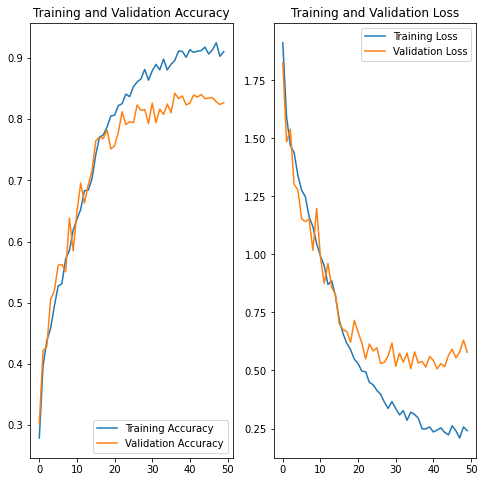

In [89]:
plotAccuracyAndLoss(history, 50)

#### **Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?**



* **Removing imbalance and using dropout/batch normlization has reduced the overfitting problem. 91% training accuracy vs 83% validation accuracy**
* **Above model has improved the performance (validation accuracy) significantly from 56% to 83%**